<a href="https://colab.research.google.com/github/jequinterope/AlgorithmsUn2020II/blob/master/GaleShapleyIrving/Gale_Shapley.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def wPrefersM1OverM(prefer, w, m, m1):   
    # Comprueba si w prefiere m1 sobre m, si prefiere a m retorna True 
    for i in range(N):
        if (prefer[w][i] == m1):
            return True
        if (prefer[w][i] == m):
            return False 

In [3]:
def stableMarriage(prefer, N):
  # Genera las parejas estables para N niños y N niñas en la que los niños hacen las propuestas
  # Los niños van enumerados del 0 a N - 1
  # Las niñas van desde N a 2N - 1

  iteration = 0
  proporsal = 0

  # Lista donde si indicara cual es el compañero de la niña, el valor de -1 indica que la niña aun esta disponible
  wPartner = [-1 for i in range(N)] 
  
  # Lista donde se almacera si el niño aun no tiene pareja en caso de que halla sido rechazado
  mPaired = [False for i in range(N)]
  freeCount = N 
  while (freeCount > 0):
    # Busca al primer hombre que aun este emparejado
    for m in range(N):
      # Recorre todos los niños que aun no esten emparejados, y posteriormente hace la propuesta a las niñas de su lista de preferencia
      if (mPaired[m]):
        continue
      i = 0
      while i < N and not mPaired[m]:
        # Primera niña en la lista de preferencia del niño m
        w = prefer[m][i]
        # Si la niña aun no esta emparejada se asigna en esta iteracion el niño que haga la propuesta
        if (wPartner[w - N] == -1):
          wPartner[w - N] = m
          mPaired[m] = True
          freeCount -= 1
        else:
          # Buscamos la pareja actual de w, m1
          m1 = wPartner[w - N]
          
          # Comprobamos si w prefiera a m1 sobre m para corregir el emparejamiento
          if (not wPrefersM1OverM(prefer, w, m, m1)):
            wPartner[w - N] = m
            mPaired[m] = True
            mPaired[m1] = False
        i += 1
      proporsal += 1
    iteration += 1
  return (wPartner, iteration, proporsal)

## Parejas estables para $n=4$ y $n = 40$
Los niños se encuentran enumerados des de 0 hasta $n-1$ y las nuñas estan enumeraddas desde $n$ hasta $2n - 1$ las listas de preferencia de las niñas y los niñoes estan almacenadas en una matriz de tamaño $2n$ x $n$ donde las filas representan las lista de preferencias de cada individuo comenzando por la lista de preferencia de los niños y posteriormen las listas de preferencia de las niñas

In [4]:
# Mejor Caso para n = 4
N = 4
prefer = [[4, 5, 6, 7],
          [5, 6, 4, 7],
          [6, 5, 4, 7],
          [7, 4, 6, 5],
          [0, 2, 3, 1],
          [1, 3, 0, 2],
          [2, 0, 1, 3],
          [3, 1, 2, 3]] 

(wPartner, iteration, proporsal) = stableMarriage(prefer, N)

print("Number of iterations:", iteration)
print("Number of proporsal: ", proporsal)
print("Woman ", " Man")
for i in range(N):
  print(i + N, "\t", wPartner[i])

Number of iterations: 1
Number of proporsal:  4
Woman   Man
4 	 0
5 	 1
6 	 2
7 	 3


In [5]:
# Peor caso para n = 4
prefer = [[4, 5, 6, 7],
          [5, 6, 4, 7],
          [6, 5, 4, 7],
          [4, 5, 6, 7],
          [1, 2, 3, 0],
          [2, 3, 0, 1],
          [3, 0, 1, 2],
          [0, 1, 2, 3]] 

(wPartner, iteration, proporsal) = stableMarriage(prefer, N)

print("Number of iterations:", iteration)
print("Number of proporsal: ", proporsal)
print("Woman ", " Man")
for i in range(N):
  print(i + N, "\t", wPartner[i])

Number of iterations: 4
Number of proporsal:  11
Woman   Man
4 	 1
5 	 2
6 	 3
7 	 0


In [6]:
# Peor caso para n = 40
N = 40

prefer = [[40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79],
               [41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,40,79],
               [42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,40,41,79],
               [43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,40,41,42,79],
               [44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,40,41,42,43,79],
               [45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,40,41,42,43,44,79],
               [46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,40,41,42,43,44,45,79],
               [47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,40,41,42,43,44,45,46,79],
               [48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,40,41,42,43,44,45,46,47,79],
               [49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,40,41,42,43,44,45,46,47,48,79],
               [50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,40,41,42,43,44,45,46,47,48,49,79],
               [51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,40,41,42,43,44,45,46,47,48,49,50,79],
               [52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,40,41,42,43,44,45,46,47,48,49,50,51,79],
               [53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,40,41,42,43,44,45,46,47,48,49,50,51,52,79],
               [54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,40,41,42,43,44,45,46,47,48,49,50,51,52,53,79],
               [55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,79],
               [56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,79],
               [57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,79],
               [58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,79],
               [59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,79],
               [60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,79],
               [61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,79],
               [62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,79],
               [63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,79],
               [64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,79],
               [65,66,67,68,69,70,71,72,73,74,75,76,77,78,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,79],
               [66,67,68,69,70,71,72,73,74,75,76,77,78,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,79],
               [67,68,69,70,71,72,73,74,75,76,77,78,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,79],
               [68,69,70,71,72,73,74,75,76,77,78,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,79],
               [69,70,71,72,73,74,75,76,77,78,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,79],
               [70,71,72,73,74,75,76,77,78,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,79],
               [71,72,73,74,75,76,77,78,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,79],
               [72,73,74,75,76,77,78,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,79],
               [73,74,75,76,77,78,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,79],
               [74,75,76,77,78,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,79],
               [75,76,77,78,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,79],
               [76,77,78,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,79],
               [77,78,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,79],
               [78,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,79],
               [40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79],
          [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,0],
          [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,0,1],
          [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,0,1,2],
          [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,0,1,2,3],
          [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,0,1,2,3,4],
          [6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,0,1,2,3,4,5],
          [7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,0,1,2,3,4,5,6],
          [8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,0,1,2,3,4,5,6,7],
          [9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,0,1,2,3,4,5,6,7,8],
          [10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,0,1,2,3,4,5,6,7,8,9],
          [11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,0,1,2,3,4,5,6,7,8,9,10],
          [12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,0,1,2,3,4,5,6,7,8,9,10,11],
          [13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,0,1,2,3,4,5,6,7,8,9,10,11,12],
          [14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,0,1,2,3,4,5,6,7,8,9,10,11,12,13],
          [15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14],
          [16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
          [17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],
          [18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17],
          [19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18],
          [20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],
          [21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
          [22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21],
          [23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22],
          [24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],
          [25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24],
          [26,27,28,29,30,31,32,33,34,35,36,37,38,39,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25],
          [27,28,29,30,31,32,33,34,35,36,37,38,39,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26],
          [28,29,30,31,32,33,34,35,36,37,38,39,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27],
          [29,30,31,32,33,34,35,36,37,38,39,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28],
          [30,31,32,33,34,35,36,37,38,39,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29],
          [31,32,33,34,35,36,37,38,39,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30],
          [32,33,34,35,36,37,38,39,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31],
          [33,34,35,36,37,38,39,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32],
          [34,35,36,37,38,39,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33],
          [35,36,37,38,39,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34],
          [36,37,38,39,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35],
          [37,38,39,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36],
          [38,39,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37],
          [39,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38]] 

(wPartner, iteration,proporsal) = stableMarriage(prefer, N)

print("Number of iterations: ", iteration)
print("Number of proporsal: ", proporsal)
print("Woman ", " Man")
for i in range(N):
  print(i + N, "\t", wPartner[i])

Number of iterations:  40
Number of proporsal:  1561
Woman   Man
40 	 1
41 	 2
42 	 3
43 	 4
44 	 5
45 	 6
46 	 7
47 	 8
48 	 9
49 	 10
50 	 11
51 	 12
52 	 13
53 	 14
54 	 15
55 	 16
56 	 17
57 	 18
58 	 19
59 	 20
60 	 21
61 	 22
62 	 23
63 	 24
64 	 25
65 	 26
66 	 27
67 	 28
68 	 29
69 	 30
70 	 31
71 	 32
72 	 33
73 	 34
74 	 35
75 	 36
76 	 37
77 	 38
78 	 39
79 	 0


## 100 veces algoritmo parejas estables
se tomo como valor de $n = 30$ pra la realizar las 100 simulaciones

Numero Promedio de Iteraciones: 23
Numero minimo de Iteraciones: 3
Numero Maximo e Iteraciones: 16
Promedio de propuestas: 184


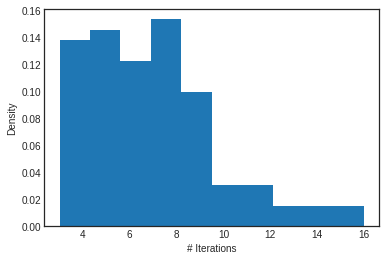

In [7]:
iterations = []
total = 0
total_proporsal = 0

for i in range(100):
  N = 30
  prefer = [[] for i in range(2*N)]
  # Generacion de las listas de preferencia de los Niños
  for i in range(N):
    prefer[i] = list (np.random.permutation([j for j in range(N, 2*N)]))

  # Generacion de las listas de preferencia de las Niñas
  for i in range(N, 2*N):
    prefer[i] = list (np.random.permutation([j for j in range(N)]))

  (wPartner, iteration, proporsal) = stableMarriage(prefer, N)
  total += iteration
  total_proporsal += proporsal
  iterations.append(iteration)

print('Numero Promedio de Iteraciones: {}\nNumero minimo de Iteraciones: {}\nNumero Maximo e Iteraciones: {}'.format(total//N, min(iterations), max(iterations)))
print('Promedio de propuestas: {}'.format(total_proporsal // N))
bins = list (set (iterations))
plt.style.use('seaborn-white')
plt.hist(iterations,density=True,label=['# Iterations'])
plt.xlabel('# Iterations')
plt.ylabel('Density');

## Referencia
* https://www.geeksforgeeks.org/stable-marriage-problem/
